In [606]:
# Libraries
import numpy as np
import pandas as pd
from sklearn import tree
import plotly.express as px
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier

In [607]:
def calc_gini_impurity(y: np.ndarray, 
                       first_classname: str = 'Yes', 
                       second_classname: str = 'No') -> float:
    '''
    This function calculates Gini Impurity Score
    '''
    # Finding length of dataset
    n = y.shape[0]
    
    # Calculating probabilities of each class by dividing number
    # of class occurancies by length of dataset.
    p_0 = y[y == first_classname].shape[0] / n
    p_1 = y[y == second_classname].shape[0] / n
    
    # Just applying formula from the textbook.
    G = p_0 * (1 - p_0) + p_1 * (1 - p_1)

    return G, n

def calc_gini_gain(gini:float,
                   g_class0:float,
                   n_class0:int,
                   g_class1:float,
                   n_class1:int):
    N = n_class0+n_class1
    return gini - (n_class0/N*g_class0+n_class1/N*g_class1)

# 1. Bagging

Original tree

In [525]:
#re-create a hypothetical dataset
data = {'Day':["1","2","3","4","5"],
        'Temperature': ["Cold","Hot","Cold","Hot","Hot"],
        'Humidity': ["Normal","Normal","Normal","High","High"],
        'Outlook': ["Rain","Rain","Sunny","Sunny","Rain"], 
        'Wind': ["Strong","Weak","Weak","Weak","Weak"],
        'Hours': ["No", "No", "Yes", "Yes", "Yes"]
       }  

#transform dataset into a DataFrame df using pandas library
df = pd.DataFrame(data)  
  
#print the output
df


,Day,Temperature,Humidity,Outlook,Wind,Hours
0,1,Cold,Normal,Rain,Strong,No
1,2,Hot,Normal,Rain,Weak,No
2,3,Cold,Normal,Sunny,Weak,Yes
3,4,Hot,High,Sunny,Weak,Yes
4,5,Hot,High,Rain,Weak,Yes


## 1.1. First Tree

### 1.1.1. Bootstrap Data 1

In [556]:
take = [2-1,
        2-1,
        3-1,
        5-1,
        1-1]

df1=df.iloc[take]
df1

,Day,Temperature,Humidity,Outlook,Wind,Hours
1,2,Hot,Normal,Rain,Weak,No
1,2,Hot,Normal,Rain,Weak,No
2,3,Cold,Normal,Sunny,Weak,Yes
4,5,Hot,High,Rain,Weak,Yes
0,1,Cold,Normal,Rain,Strong,No


In [605]:
df_enc = pd.get_dummies(df1)
X = df_enc[["Temperature_Cold","Humidity_Normal", "Outlook_Rain", "Wind_Weak"]]
y = df_enc.Hours_Yes.values


In [608]:
gini, n = calc_gini_impurity(df.Hours)
gini

0.48

## Outlook

In [613]:
g_rain, n_rain = calc_gini_impurity(df.Hours[df.Outlook=="Rain"])
print(g_rain)
g_sunny, n_sunny = calc_gini_impurity(df.Hours[df.Outlook=="Sunny"])
print(g_sunny)

g_gain_outlook = calc_gini_gain(gini, g_rain, n_rain, g_sunny, n_sunny)
print(g_gain_outlook)

0.4444444444444445
0.0
0.21333333333333332


## Temperature

In [614]:
g_cold, n_cold = calc_gini_impurity(df.Hours[df.Temperature=="Cold"])
print("G_cold =", g_cold)
g_hot, n_hot = calc_gini_impurity(df.Hours[df.Temperature=="Hot"])
print("G_hot =",g_hot)

g_gain_temp = calc_gini_gain(gini, g_cold, n_cold, g_hot, n_hot)
print(g_gain_temp)

G_cold = 0.5
G_hot = 0.4444444444444445
0.013333333333333308


## Wind

In [611]:
g_strong, n_strong = calc_gini_impurity(df.Hours[df.Wind=="Strong"])
g_weak, n_weak = calc_gini_impurity(df.Hours[df.Wind=="Weak"])

g_gain_wind = calc_gini_gain(gini, g_strong, n_strong, g_weak, n_weak)
print(g_gain_wind)

0.17999999999999994


## Humidity

In [612]:
g_normal, n_normal = calc_gini_impurity(df.Hours[df.Humidity=="Normal"])
g_high, n_high = calc_gini_impurity(df.Hours[df.Humidity=="High"])

g_gain_humidity = calc_gini_gain(gini, g_normal, n_normal, g_high, n_high)
print(g_gain_humidity)


0.21333333333333332


### 1.1.2. Decision Tree

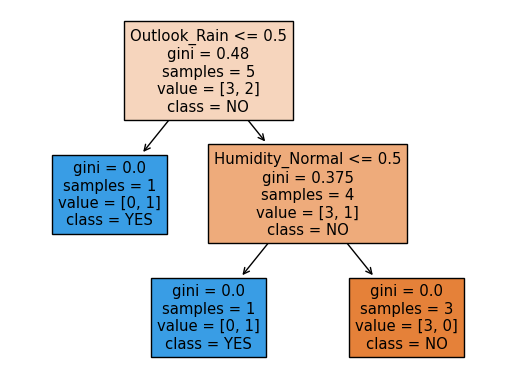

In [558]:
# Initialize the model
clf = DecisionTreeClassifier(criterion='gini', min_samples_leaf=1)
# Train the model
clf.fit(X, y)
#plot
fig_tree = tree.plot_tree(clf, 
                          feature_names=["Temperature_Cold", "Humidity_Normal", "Outlook_Rain", "Wind_Weak"],  
                          class_names=['NO', 'YES'],
                          filled=True)

## 1.2. Second Tree

### 1.2.1. Bootstrap Data 1

In [589]:
take = [2-1,
        3-1,
        4-1,
        3-1,
        3-1]

df2=df.iloc[take]

df2



,Day,Temperature,Humidity,Outlook,Wind,Hours
1,2,Hot,Normal,Rain,Weak,No
2,3,Cold,Normal,Sunny,Weak,Yes
3,4,Hot,High,Sunny,Weak,Yes
2,3,Cold,Normal,Sunny,Weak,Yes
2,3,Cold,Normal,Sunny,Weak,Yes


In [587]:
df_enc = pd.get_dummies(df2)

X = df_enc[["Temperature_Cold","Humidity_Normal", "Outlook_Rain", "Wind_Weak"]]
y = df_enc.Hours_Yes.values

### 1.2.2. Decision Tree

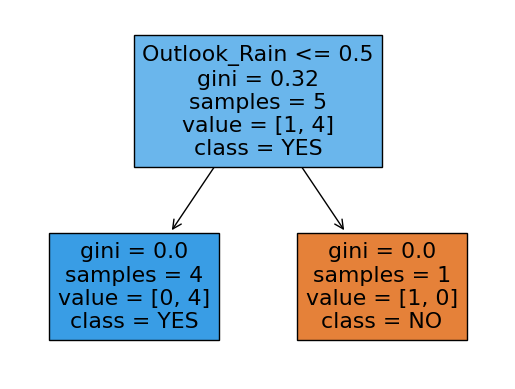

In [588]:
# Initialize the model
clf = DecisionTreeClassifier(criterion='gini',min_samples_leaf=1)
# Train the model
clf.fit(X, y)
#plot
fig_tree = tree.plot_tree(clf, 
                          feature_names=["Temperature_Cold", "Humidity_Normal", "Outlook_Rain", "Wind_Weak"],  
                          class_names=['NO', 'YES'],
                          filled=True)

## 1.3. Third Tree

### 1.2.1. Bootstrap Data 1

In [602]:

take = [1-1,
        4-1,
        5-1,
        3-1,
        4-1]

df3=df.iloc[take]


df3



,Day,Temperature,Humidity,Outlook,Wind,Hours
0,1,Cold,Normal,Rain,Strong,No
3,4,Hot,High,Sunny,Weak,Yes
4,5,Hot,High,Rain,Weak,Yes
2,3,Cold,Normal,Sunny,Weak,Yes
3,4,Hot,High,Sunny,Weak,Yes


In [603]:
df_enc = pd.get_dummies(df3)
X = df_enc[["Temperature_Cold","Humidity_Normal", "Outlook_Rain", "Wind_Strong"]]
y = df_enc.Hours_Yes.values


### 1.3.2. Decision Tree

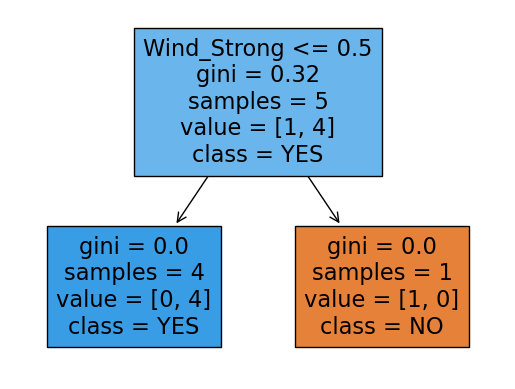

In [604]:
# Initialize the model
clf = DecisionTreeClassifier(criterion='gini')
# Train the model
clf.fit(X, y)
#plot
fig_tree = tree.plot_tree(clf, 
                          feature_names=["Temperature_Cold", "Humidity_Normal", "Outlook_Rain", "Wind_Strong"],  
                          class_names=['NO', 'YES'],
                          filled=True)

In [621]:
from sklearn.ensemble import BaggingClassifier
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split

In [619]:
df = pd.read_csv("https://raw.githubusercontent.com/5x12/ml-cookbook/master/supplements/data/heart.csv")

In [620]:
X = df.iloc[:, :13]
y = df.target

In [622]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=101)

In [624]:
train_error = []
test_error = []
n = []

for i in range(1, 1000):
    clf = BaggingClassifier(n_estimators=i, random_state=96)
    clf.fit(X_train, y_train)
    train_error.append(1-clf.score(X_train, y_train))
    test_error.append(1-clf.score(X_test, y_test))
    n.append(i)

(0.0, 100.0)

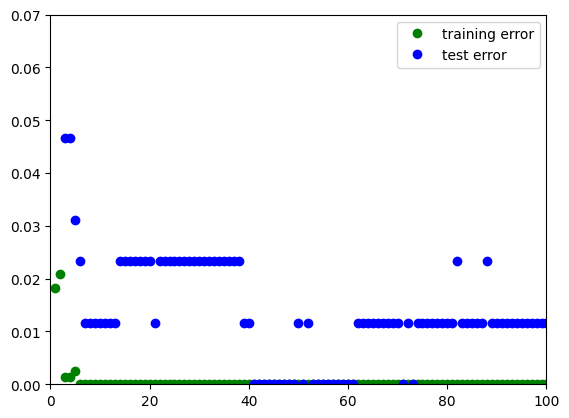

In [630]:
#define the graph
fig, ax = plt.subplots()

#plotting training dataset
ax.plot(n, train_error, 'o', color='g', label='training error')
ax.plot(n, test_error, 'o', color='b', label='test error')

#showing legend and setting the size of the graph
plt.legend() #show legend
plt.ylim(0, 0.07) #length of y-axis
plt.xlim(0, 100) #length of x-axis
